# ML Assignment – 3 (Ensembles, Boosting, KNN, PCA, t-SNE)  
**Submitter Name:** Aasif Majeed  
**Date:** 24 May 2024  

This notebook answers **all 90 questions** from the provided assignment PDF, with **detailed explanations and examples**.  
For each question:
- The **question statement** is written with its number.
- A **detailed answer** is provided (definitions + intuition + example).
- Optional demo code is included at the end for practical understanding.


---
## 0) Imports (optional demo code)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)


---
# Answers (1–90)
---

## Q1) What are ensemble techniques in machine learning?

Ensemble techniques combine **multiple models** (called *base learners*) to produce a single, usually stronger, final prediction.  
The idea is similar to “wisdom of the crowd”: if individual models make different mistakes, combining them can cancel errors.

**Why ensembles help**
- Reduce **variance** (make predictions more stable) → e.g., bagging / Random Forest
- Reduce **bias** (make model more expressive) → e.g., boosting / Gradient Boosting
- Improve **robustness** to noise and small dataset changes

**Example**
- Instead of training one decision tree (high variance), train 200 trees on different bootstrap samples and average them → Random Forest often generalizes much better.


## Q2) Explain bagging and how it works in ensemble techniques.

**Bagging (Bootstrap Aggregating)** trains many models **in parallel** using different bootstrap samples of the training data, then combines their predictions.

**How it works (step-by-step)**
1. Create \(B\) bootstrap datasets by sampling **with replacement** from the original training set.
2. Train one base model on each bootstrap sample (often decision trees).
3. Combine predictions:
   - **Regression**: average predictions  
   - **Classification**: majority vote (or average probabilities)

**Intuition**
A single tree can change a lot if the data changes slightly (high variance). Bagging averages many trees trained on slightly different datasets, which smooths out the instability.

**Example**
Random Forest is basically bagging + extra randomness in features.


## Q3) What is the purpose of bootstrapping in bagging?

**Bootstrapping** is sampling **with replacement** to create multiple training sets from the original dataset.

**Purpose in bagging**
- Creates **diverse** datasets so each base model learns slightly different patterns.
- This diversity is what reduces **variance** when we average/vote.

**Key detail**
In a bootstrap sample of size \(n\), about **63.2%** of the original unique points appear (on average). The rest (~36.8%) are “out-of-bag” and can be used for validation (**OOB score**).

**Example**
If you have 1,000 rows, each bootstrap dataset also has 1,000 rows, but some rows repeat and some are missing. That creates model diversity.


## Q4) Describe the random forest algorithm.

**Random Forest** is an ensemble of decision trees trained using:
1) **Bagging** (bootstrap samples of data), and  
2) **Random feature selection** at each split (feature bagging).

**Algorithm (classification/regression)**
1. For each tree \(t=1..T\):
   - Take a bootstrap sample of the training data.
   - Grow a decision tree:
     - At each split, choose the best split **only among a random subset of features** (e.g., \(\sqrt{p}\) features for classification).
     - Grow tree deep (often unpruned).
2. Combine predictions:
   - Classification: majority vote / average probabilities
   - Regression: average

**Example**
For a dataset with 20 features, each split might only consider 4–5 randomly chosen features, which makes trees less correlated and improves ensemble performance.


## Q5) How does randomization reduce overfitting in random forests?

Randomization reduces overfitting in Random Forest mainly by **reducing correlation** among trees.

**Two sources of randomness**
1. **Bootstrap sampling**: each tree sees a different dataset.
2. **Random feature subset at each split**: trees use different features and produce different structures.

**Why that reduces overfitting**
- Individual trees can overfit, but averaging many *uncorrelated* overfit trees reduces variance.
- If all trees were very similar, averaging wouldn’t help much.

**Example**
If one strong feature dominates splitting, all trees become similar. Feature randomness forces trees to explore alternative features, increasing diversity and improving generalization.


## Q6) Explain the concept of feature bagging in random forests.

**Feature bagging** means: at each split in each tree, you randomly choose a subset of features and only consider those for splitting.

**Why it’s useful**
- De-correlates trees (prevents all trees from using the same top feature repeatedly).
- Improves ensemble diversity → better variance reduction.
- Helps when there are many correlated predictors.

**Typical settings**
- Classification: \(m = \sqrt{p}\) features per split
- Regression: \(m = p/3\) (common rule of thumb)

**Example**
With 100 features, if you choose 10 random features per split, different trees will end up splitting on different features → more diverse forest.


## Q7) What is the role of decision trees in gradient boosting?

In **gradient boosting**, the base learners are usually **shallow decision trees** (often called *decision stumps* if depth=1).

**Role of trees in gradient boosting**
- Each tree is trained to predict the **residual errors** (or negative gradient of the loss) of the ensemble so far.
- Trees act as **weak learners** that make small improvements step-by-step.

**Example (regression)**
- Start with a constant prediction (mean of y).
- Compute residuals: \(r_i = y_i - \hat{y}_i\).
- Fit a small tree to predict residuals.
- Update: \(\hat{y} \leftarrow \hat{y} + \eta \cdot \text{tree}(x)\).

So, trees are the building blocks that gradually correct mistakes.


## Q8) Differentiate between bagging and boosting.

**Bagging vs Boosting (core difference)**

**Bagging**
- Trains models **in parallel**
- Uses bootstrap sampling
- Main goal: **reduce variance**
- Works well with high-variance learners (e.g., decision trees)
- Example: Random Forest

**Boosting**
- Trains models **sequentially**
- Each new model focuses on previous errors
- Main goal: **reduce bias** (and sometimes variance)
- Can produce very strong learners
- Example: AdaBoost, Gradient Boosting, XGBoost

**Simple analogy**
Bagging = “many independent voters”  
Boosting = “a team learning from previous mistakes”


## Q9) What is the AdaBoost algorithm, and how does it work?

**AdaBoost (Adaptive Boosting)** builds an ensemble by training weak learners sequentially and **reweighting** training samples to focus on difficult cases.

**How it works (binary classification intuition)**
1. Start with equal weights for all training samples.
2. Train a weak learner (often a decision stump).
3. Compute error rate: samples misclassified have higher error.
4. Increase weights of misclassified samples and decrease weights of correctly classified samples.
5. Train next weak learner on this reweighted data.
6. Final prediction is a **weighted vote** of all weak learners (learners with lower error get higher vote weight).

**Example**
If your first stump misclassifies 10 hard points, AdaBoost increases their weights so the second stump “pays more attention” to them.


## Q10) Explain the concept of weak learners in boosting algorithms.

A **weak learner** is a model that performs only **slightly better than random guessing** but is still informative.

**In boosting**
- Weak learners are combined to create a strong learner.
- Typical weak learners: **decision stumps** (trees of depth 1), shallow trees (depth 2–4).

**Why use weak learners?**
- They are simple and fast.
- They avoid overfitting in each step, while the ensemble gradually improves accuracy.

**Example**
A decision stump that classifies “spam” if the email contains the word “free” might only be 55% accurate, but combining many such stumps can yield high accuracy.


## Q11) Describe the process of adaptive boosting.

**Adaptive boosting** refers to boosting methods (like AdaBoost) that **adapt** to the data by emphasizing the samples that are hard to classify.

**Process**
1. Initialize sample weights uniformly.
2. Train weak learner \(h_t(x)\).
3. Compute weighted error \(e_t\).
4. Assign learner weight \(\alpha_t\) based on error (lower error → higher \(\alpha_t\)).
5. Update sample weights:
   - Increase weights for misclassified points
   - Decrease weights for correctly classified points
6. Repeat for \(T\) rounds.
7. Final model: sign of weighted sum \(\sum_t \alpha_t h_t(x)\)

**Example**
If a minority class is frequently misclassified, its sample weights increase, pushing later learners to handle it better.


## Q12) How does AdaBoost adjust weights for misclassified data points?

AdaBoost updates weights so that misclassified points become more important in the next round.

**Weight update idea**
- If sample \(i\) is misclassified by learner \(t\), its weight \(w_i\) is multiplied by a factor \(>1\).
- If correctly classified, its weight is multiplied by a factor \(<1\).

A common form (binary classification):
\[
w_i \leftarrow w_i \exp(\alpha_t \cdot I[y_i \ne h_t(x_i)])
\]
Then weights are normalized to sum to 1.

**Example**
Suppose point A is misclassified twice. Its weight can become much larger, making future learners try harder to classify it correctly.


## Q13) Discuss the XGBoost algorithm and its advantages over traditional gradient boosting.

**XGBoost (Extreme Gradient Boosting)** is an optimized, regularized implementation of gradient boosting designed for performance and accuracy.

**What it adds over “basic” gradient boosting**
- **Regularization** on tree complexity (L1/L2 on leaf weights + penalty for number of leaves)
- **Second-order optimization** (uses gradients and Hessians)
- **Efficient training**: parallelization, cache-aware blocks, sparsity-aware splits
- Handles missing values natively (learns default direction)
- Built-in **shrinkage**, column subsampling, row subsampling
- Supports early stopping and many loss functions

**Example advantage**
On large tabular datasets, XGBoost often trains faster and generalizes better because it controls overfitting and uses smarter split finding.


## Q14) Explain the concept of regularization in XGBoost.

Regularization in XGBoost controls model complexity to prevent overfitting.

**Two levels of regularization**
1. **Tree structure penalty**
   - \(\gamma\) penalizes adding new leaves (discourages overly complex trees).
2. **Leaf weight penalties**
   - L2 penalty (\(\lambda\)) shrinks leaf weights.
   - L1 penalty (\(\alpha\)) encourages sparsity in leaf weights (can set some to zero).

XGBoost’s objective includes:
\[
\text{loss} + \text{regularization}(tree)
\]

**Example**
If a split improves training loss only slightly, \(\gamma\) may prevent that split, keeping the tree simpler and improving test performance.


## Q15) What are the different types of ensemble techniques?

Common ensemble technique categories:

1. **Bagging ensembles**
   - Random Forest, Bagged Trees
2. **Boosting ensembles**
   - AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost
3. **Stacking (stacked generalization)**
   - Train multiple models and combine them using a meta-model
4. **Voting ensembles**
   - Hard voting (majority) or soft voting (average probabilities)
5. **Blending**
   - Like stacking but uses a holdout set instead of cross-validated meta-features

**Example**
A stacking ensemble might combine Logistic Regression + SVM + Random Forest, then use another Logistic Regression as the meta-learner.


## Q16) Compare and contrast bagging and boosting.

**Bagging vs Boosting (core difference)**

**Bagging**
- Trains models **in parallel**
- Uses bootstrap sampling
- Main goal: **reduce variance**
- Works well with high-variance learners (e.g., decision trees)
- Example: Random Forest

**Boosting**
- Trains models **sequentially**
- Each new model focuses on previous errors
- Main goal: **reduce bias** (and sometimes variance)
- Can produce very strong learners
- Example: AdaBoost, Gradient Boosting, XGBoost

**Simple analogy**
Bagging = “many independent voters”  
Boosting = “a team learning from previous mistakes”

**Extra comparison points**
- Bagging is generally easier to parallelize (independent learners).
- Boosting is more sensitive to hyperparameters (learning rate, number of estimators).
- Boosting can overfit noisy labels more easily (especially AdaBoost) if not regularized.


## Q17) Discuss the concept of ensemble diversity.

**Ensemble diversity** means the base models make **different errors** (low correlation). Diversity is critical: if all models are identical, combining them gives no benefit.

**How diversity is achieved**
- Different training samples (bootstrapping)
- Different feature subsets (feature bagging)
- Different model types (stacking/voting: SVM + tree + logistic)
- Different hyperparameters or random seeds
- Different data transformations

**Example**
Random Forest increases diversity by both bootstrapping rows and randomly selecting features at each split.


## Q18) How do ensemble techniques improve predictive performance?

Ensembles improve predictive performance by reducing **generalization error** through:
- **Variance reduction** (bagging): stabilizes unstable learners like trees.
- **Bias reduction** (boosting): builds a more flexible function by adding learners sequentially.
- **Robustness**: averages out noise effects and reduces dependence on a single model.

**Example**
A single tree might overfit and get 75% accuracy, but a Random Forest of 300 trees might reach 85% because averaging cancels overfitting.


## Q19) Explain the concept of ensemble variance and bias.

Think of prediction error (for many problems) as involving **bias** and **variance**:
- **Bias**: error from wrong assumptions / underfitting (model too simple)
- **Variance**: error from sensitivity to training data / overfitting (model too complex)

**Ensemble variance**
- Bagging reduces variance by averaging many models.
- If base models are diverse, ensemble variance becomes much smaller.

**Ensemble bias**
- Boosting can reduce bias by adding models that correct residual errors.

**Example**
Single deep tree: low bias, high variance  
Random Forest: similar bias, much lower variance  
Gradient boosting: can reduce both, but must be regularized to avoid high variance.


## Q20) Discuss the trade-off between bias and variance in ensemble learning.

The bias–variance trade-off in ensembles depends on which ensemble you use.

- **Bagging**: primarily reduces variance while keeping bias similar to the base learner.
- **Boosting**: often reduces bias substantially, but if pushed too far can increase variance (overfitting).

**Practical trade-off**
- If your model overfits (high variance), use bagging / Random Forest.
- If your model underfits (high bias), use boosting / deeper learners / better features.

**Example**
A weak decision stump underfits → boosting can greatly improve accuracy by reducing bias.


## Q21) What are some common applications of ensemble techniques?

Common applications of ensemble methods:
- **Fraud detection** and risk scoring (boosting)
- **Credit scoring** (XGBoost / LightGBM)
- **Search ranking / recommendation** (boosting + features)
- **Medical diagnosis** (ensembles for robust classification)
- **Computer vision** (historically boosting; now deep nets but ensembles still used for competitions)
- **Kaggle tabular problems** (XGBoost/LightGBM/CatBoost dominate)

**Example**
Banks often use boosted tree models for loan default prediction because they handle nonlinear feature interactions well.


## Q22) How does ensemble learning contribute to model interpretability?

Ensembles affect interpretability in mixed ways:

**How they can improve interpretability**
- Provide **feature importance** (Random Forest, XGBoost)
- Allow **partial dependence plots** / SHAP values for global & local explanations
- Stacking can show which base learner contributes most to final prediction

**How they can reduce interpretability**
- Many models combined → harder to explain than a single tree or linear model.

**Example**
A single tree is easy to explain, but a Random Forest needs tools like feature importance or SHAP to interpret decisions.


## Q23) Describe the process of stacking in ensemble learning.

**Stacking** (stacked generalization) combines different base models by training a **meta-model** on their predictions.

**Steps**
1. Train several base models (e.g., SVM, Random Forest, Logistic Regression).
2. Use cross-validation to generate **out-of-fold predictions** from each base model.
3. Create a new dataset where features = base model predictions.
4. Train a **meta-learner** (e.g., logistic regression) on this new dataset.
5. For test data, get base predictions → feed into meta-learner → final prediction.

**Example**
Base models: (RF, SVM, kNN). Meta-learner learns that RF is better for some patterns while SVM is better for others.


## Q24) Discuss the role of meta-learners in stacking.

The **meta-learner** (also called level-2 model) learns how to best combine the base learners.

**What it learns**
- which base models are more reliable in certain regions of feature space
- how to weight model predictions
- how to correct systematic biases from base models

**Common meta-learners**
- Logistic regression (simple, robust)
- Gradient boosting
- Linear regression (for regression stacking)

**Example**
If model A tends to overpredict for high values and model B underpredicts, the meta-learner can learn a correction using both outputs.


## Q25) What are some challenges associated with ensemble techniques?

Challenges with ensemble techniques include:

1. **Computational cost**
   - Many models → more training time and memory.
2. **Hyperparameter tuning complexity**
   - Boosting has many sensitive parameters (learning rate, depth, estimators).
3. **Interpretability**
   - Harder than a single model; requires tools like SHAP.
4. **Data leakage risk in stacking**
   - Must use out-of-fold predictions; otherwise meta-learner overfits.
5. **Overfitting (especially boosting)**
   - Needs regularization and early stopping.
6. **Deployment complexity**
   - Larger models, more dependencies, inference latency.

**Example**
A stacked ensemble can perform best but is harder to deploy than a single Random Forest.


## Q26) What is boosting, and how does it differ from bagging?

**Boosting** builds an ensemble by training models **sequentially**, where each new model focuses on correcting the previous models’ errors.

Difference from bagging:
- Bagging: parallel, bootstrap samples, reduces variance.
- Boosting: sequential, focuses on errors, reduces bias (and can reduce variance too).

**Example**
AdaBoost increases weight on misclassified points; Gradient Boosting fits trees to residuals.


## Q27) Explain the intuition behind boosting.

**Intuition behind boosting**
Start with a simple model that’s “not great”, then repeatedly add small models that fix what’s still wrong.

Think of it like:
- First learner gives a rough answer.
- Second learner corrects the parts where the first learner failed.
- Third learner corrects remaining mistakes, and so on.

**Example (regression)**
If the first model underestimates high values, the next model learns a correction function for those high regions.


## Q28) Describe the concept of sequential training in boosting.

**Sequential training** means models are trained one after another, not independently.

In boosting:
1. Train model 1
2. Identify mistakes/residuals
3. Train model 2 to reduce those mistakes
4. Repeat

Because each model depends on previous results, boosting is less parallelizable than bagging.

**Example**
Gradient Boosting fits tree 2 on residuals after tree 1, so you cannot train tree 2 before tree 1.


## Q29) How does boosting handle misclassified data points?

Boosting handles misclassified points by **increasing their influence** in the next training step.

- **AdaBoost**: increases sample weights for misclassified points so the next weak learner focuses on them.
- **Gradient Boosting**: fits new learners on residuals/gradients; mispredicted points produce larger residuals, so they drive the next learner more.

**Example**
If minority-class points are misclassified, their weights/residuals become larger → later learners try to classify them correctly.


## Q30) Discuss the role of weights in boosting algorithms.

Weights in boosting serve two important roles:

1. **Sample weights**
   - Determine how much each training point influences the next learner.
   - Misclassified points get higher weight (AdaBoost).

2. **Learner weights**
   - Determine how much each weak learner contributes to final prediction.
   - Better learners get higher \(\alpha_t\) (AdaBoost).

**Example**
A weak learner with 5% error gets a larger vote than a weak learner with 30% error.


## Q31) What is the difference between boosting and AdaBoost?

**Boosting** is the general family of sequential ensemble methods (AdaBoost, Gradient Boosting, XGBoost, etc.).

**AdaBoost** is a specific boosting algorithm that:
- uses **sample reweighting** based on misclassification,
- typically combines weak learners via a weighted vote,
- originally designed mainly for classification.

**Example**
Gradient Boosting focuses on residuals (loss gradients), while AdaBoost focuses on misclassification weights.


## Q32) How does AdaBoost adjust weights for misclassified samples?

AdaBoost updates weights so that misclassified points become more important in the next round.

**Weight update idea**
- If sample \(i\) is misclassified by learner \(t\), its weight \(w_i\) is multiplied by a factor \(>1\).
- If correctly classified, its weight is multiplied by a factor \(<1\).

A common form (binary classification):
\[
w_i \leftarrow w_i \exp(\alpha_t \cdot I[y_i \ne h_t(x_i)])
\]
Then weights are normalized to sum to 1.

**Example**
Suppose point A is misclassified twice. Its weight can become much larger, making future learners try harder to classify it correctly.


## Q33) Explain the concept of weak learners in boosting algorithms.

A **weak learner** is a model that performs only **slightly better than random guessing** but is still informative.

**In boosting**
- Weak learners are combined to create a strong learner.
- Typical weak learners: **decision stumps** (trees of depth 1), shallow trees (depth 2–4).

**Why use weak learners?**
- They are simple and fast.
- They avoid overfitting in each step, while the ensemble gradually improves accuracy.

**Example**
A decision stump that classifies “spam” if the email contains the word “free” might only be 55% accurate, but combining many such stumps can yield high accuracy.


## Q34) Discuss the process of gradient boosting.

**Gradient Boosting** builds an additive model:
\[
F(x) = F_0(x) + \sum_{t=1}^{T} \eta \, h_t(x)
\]
where each new learner \(h_t\) is trained to fit the **negative gradient** of the loss function w.r.t. current predictions.

**Process (high level)**
1. Initialize with a constant model \(F_0\) (e.g., mean for regression).
2. For each iteration \(t\):
   - Compute residuals/gradients: what the current model is getting wrong.
   - Fit a small decision tree \(h_t(x)\) to those gradients.
   - Update predictions by adding the tree output scaled by learning rate \(\eta\).

**Example**
For squared error loss, gradients are just residuals \(y-\hat{y}\). So trees fit residuals directly.


## Q35) What is the purpose of gradient descent in gradient boosting?

Gradient boosting is often trained using **gradient descent in function space**.

**Purpose**
- The model tries to minimize a loss function \(L(y, F(x))\).
- Each boosting step moves in the direction that decreases the loss the most (negative gradient).

So “gradient descent” explains *why* fitting residuals/gradients is a principled way to improve predictions.

**Example**
If the loss is log-loss for classification, gradients differ from simple residuals, but the boosting framework still works by fitting trees to those gradients.


## Q36) Describe the role of learning rate in gradient boosting.

The **learning rate** (\(\eta\), also called *shrinkage*) scales how much each new tree contributes:
\[
F_{t}(x) = F_{t-1}(x) + \eta \, h_t(x)
\]

**Effect**
- Small \(\eta\) (e.g., 0.05):
  - slower learning, needs more trees
  - usually better generalization, less overfitting
- Large \(\eta\) (e.g., 0.5):
  - faster fit, but higher overfitting risk

**Example**
A common practice is: choose \(\eta\) small and increase the number of trees, using early stopping to stop at the best point.


## Q37) How does gradient boosting handle overfitting?

Gradient boosting can overfit if too many trees or too deep trees are used. It handles overfitting using regularization techniques such as:

- **Learning rate shrinkage** (smaller \(\eta\))
- **Early stopping** (stop when validation loss stops improving)
- **Tree constraints**: max_depth, min_samples_leaf, max_leaf_nodes
- **Subsampling**: train each tree on a random subset of rows (stochastic gradient boosting)
- **Column subsampling** (in XGBoost/LightGBM)
- **L1/L2 regularization** (XGBoost)

**Example**
Using depth=3 trees + learning_rate=0.05 + early stopping is usually much safer than depth=10 and learning_rate=0.3.


## Q38) Discuss the differences between gradient boosting and XGBoost.

**Gradient Boosting (GBDT) vs XGBoost**

Both:
- build trees sequentially
- fit gradients/residuals
- combine many weak trees

XGBoost adds:
- explicit **regularization** on tree complexity (gamma, lambda, alpha)
- uses **2nd-order** derivatives (Hessians) for better optimization
- advanced system features: parallel split finding, sparsity-aware computation
- native missing-value handling
- better scaling and speed on large datasets

**Example**
On large tabular datasets, XGBoost usually trains faster and can generalize better with the same or better accuracy than standard GBDT.


## Q39) Explain the concept of regularized boosting.

**Regularized boosting** means boosting with explicit mechanisms to control model complexity and prevent overfitting.

Regularization can include:
- shrinkage (learning rate)
- limiting tree depth/leaves
- subsampling rows/columns
- penalties on leaf weights and tree structure (as in XGBoost)
- early stopping

**Example**
XGBoost’s objective includes a regularization term that penalizes too many leaves and large leaf weights, discouraging overly complex trees.


## Q40) What are the advantages of using XGBoost over traditional gradient boosting?

Advantages of XGBoost over traditional gradient boosting:
- **Better regularization** (L1/L2 + gamma) → less overfitting
- **Faster training** with optimized implementation and parallelization
- Handles **missing values** natively
- Supports **column subsampling** and sparsity-aware splits
- Uses **second-order** information for more accurate updates
- Strong performance on many tabular ML tasks

**Example**
With early stopping + regularization, XGBoost often reaches strong accuracy with fewer overfitting problems than basic GBDT.


## Q41) Describe the process of early stopping in boosting algorithms.

**Early stopping** stops boosting when performance on a validation set stops improving.

**Process**
1. Split data into training and validation sets (or use CV).
2. Train boosting model for many iterations (trees).
3. After each iteration, compute validation metric (loss, AUC, etc.).
4. If metric does not improve for `patience` rounds, stop training and keep the best model.

**Example**
If validation AUC improves until 120 trees and then declines, early stopping will stop around that area instead of training 500 trees and overfitting.


## Q42) How does early stopping prevent overfitting in boosting?

Early stopping prevents overfitting because boosting can keep improving training loss even after it starts fitting noise.

By stopping at the iteration where validation performance is best, you select a model with better generalization.

**Example**
Training loss decreases monotonically, but validation loss often follows a U-shape. Early stopping chooses the minimum point of the validation curve.


## Q43) Discuss the role of hyperparameters in boosting algorithms.

Boosting performance depends strongly on hyperparameters because each parameter controls complexity or learning dynamics.

Important hyperparameters:
- `n_estimators` (number of trees)
- `learning_rate` (\(\eta\))
- `max_depth` / `max_leaf_nodes`
- `subsample` (row subsampling)
- `colsample_bytree` / `colsample_bynode`
- regularization terms (XGBoost: `lambda`, `alpha`, `gamma`)

**Example**
A small learning rate with too few estimators underfits; too many estimators without early stopping overfits.


## Q44) What are some common challenges associated with boosting?

Common challenges with boosting:
- Sensitive to hyperparameters; needs careful tuning.
- Can overfit noisy labels and outliers if too aggressive.
- Less parallelizable because of sequential nature.
- Harder to interpret than single models (needs SHAP/feature importance).
- For imbalanced data, default objective may focus on majority class unless adjusted.

**Example**
AdaBoost can focus too much on mislabeled points (noise), increasing their weights and harming generalization.


## Q45) Explain the concept of boosting convergence.

**Boosting convergence** refers to how the boosting process approaches a model that minimizes the loss.

Key ideas:
- Each iteration should reduce training loss (especially with proper learning rate).
- Convergence depends on learning rate, number of estimators, and weak learner capacity.
- Too large learning rate may oscillate or overfit quickly; too small may converge slowly.

**Example**
With learning_rate=0.01, you may need hundreds or thousands of trees for convergence, but results can be smoother and more generalizable.


## Q46) How does boosting improve the performance of weak learners?

Boosting improves weak learners by combining many of them in a way that each new learner focuses on what previous ones missed.

- Weak learner 1 captures easy patterns.
- Weak learner 2 focuses on remaining errors.
- Over many iterations, the sum becomes a strong predictor.

**Example**
A single decision stump may only capture one simple rule. Boosting 200 stumps can approximate a complex nonlinear decision boundary.


## Q47) Discuss the impact of data imbalance on boosting algorithms.

Data imbalance affects boosting because:
- the loss is dominated by majority-class errors
- the model may learn to prioritize majority accuracy over minority recall

How to handle imbalance in boosting:
- Use **class weights** or scale_pos_weight (XGBoost)
- Adjust decision threshold
- Use appropriate metrics (PR-AUC, F1, recall)
- Resample data (SMOTE/oversampling minority, undersampling majority)
- Use specialized objectives (e.g., focal loss in some frameworks)

**Example**
In fraud detection (rare positives), tuning for PR-AUC and using class weights improves detection of fraud cases.


## Q48) What are some real-world applications of boosting?

Real-world applications of boosting:
- **Credit risk** and default prediction
- **Fraud detection**
- **Click-through rate prediction**
- **Customer churn**
- **Search ranking** (learning-to-rank)
- **Pricing and demand forecasting**
- **Medical risk scoring**

**Example**
Many production recommendation/ranking systems use gradient boosted trees on engineered features for strong accuracy and fast inference.


## Q49) Describe the process of ensemble selection in boosting.

**Ensemble selection in boosting** means choosing:
- the number of boosting stages (trees)
- which weak learners to include (often fixed template trees but selection is via early stopping)
- best hyperparameters that determine the final ensemble

Common approach:
- Train with many estimators and use **early stopping** to select the best iteration.
- Use CV/grid/random/Bayesian search to select hyperparameters.

**Example**
Train 2000 trees with early stopping patience=50; model automatically selects the best “ensemble size” based on validation performance.


## Q50) How does boosting contribute to model interpretability?

Boosting interpretability:
- Individual trees are small and interpretable, but the **sum of many trees** is not easily read.
- However, boosting models support strong interpretability tools:
  - Feature importance (gain/cover/split counts)
  - SHAP values (local + global explanations)
  - Partial dependence / ICE plots

**Example**
In XGBoost, SHAP can explain why a specific loan application was rejected (which features pushed probability up or down).


## Q51) Explain the curse of dimensionality and its impact on KNN.

The **curse of dimensionality** means that as the number of features grows:
- data becomes sparse
- distances between points become less informative
- nearest neighbors become “not very near”

Impact on KNN:
- KNN relies on distance; when distances become similar, neighbors are noisy.
- Accuracy often drops unless you have a huge amount of data.

**Example**
In 2D, neighbors are meaningful. In 100D, almost all points are far away and distances concentrate, so KNN struggles.


## Q52) What are the applications of KNN in real-world scenarios?

Applications of KNN:
- **Recommendation** (find similar users/items)
- **Image recognition** (simple baseline using pixel/feature similarity)
- **Text similarity** (with embeddings)
- **Anomaly detection** (points far from neighbors)
- **Medical diagnosis** (case-based reasoning)
- **Customer segmentation** (as a similarity tool)

**Example**
Given a new customer profile, find the 10 most similar past customers and predict likely churn behavior by majority vote.


## Q53) Discuss the concept of weighted KNN.

**Weighted KNN** gives more influence to closer neighbors.

Instead of simple majority vote/average, use weights like:
\[
w_i = \frac{1}{d(x, x_i) + \epsilon}
\]
Then:
- Classification: weighted vote
- Regression: weighted average

**Why useful**
- closer points are usually more relevant than farther ones
- reduces sensitivity to choosing k too large

**Example**
If one very close neighbor is class A and four farther neighbors are class B, weighted KNN may still predict A.


## Q54) How do you handle missing values in KNN?

KNN itself typically cannot handle missing values directly because distance computation requires complete features.

Common strategies:
1. **Impute missing values**
   - numeric: mean/median
   - categorical: mode
2. **Use distance metrics that can ignore missing dimensions** (less common in standard libraries)
3. **Add missing indicator features** to capture informative missingness

**Example**
Impute age with median age, then standardize features and run KNN.


## Q55) Explain the difference between lazy learning and eager learning algorithms, and where does KNN fit in?

**Eager learning**: model builds a general rule during training (e.g., logistic regression, decision trees). Prediction is fast after training.

**Lazy learning**: model does little training and postpones computation to prediction time. KNN is **lazy** because:
- it stores the dataset
- at prediction, it computes distances to training points and decides based on neighbors

**Example**
Training KNN is basically “store data”; prediction is expensive because it searches neighbors.


## Q56) What are some methods to improve the performance of KNN?

Methods to improve KNN performance:
- **Feature scaling** (standardization/min-max)
- **Dimensionality reduction** (PCA) to fight curse of dimensionality
- Choose good **distance metric** (Euclidean, Manhattan, cosine)
- Tune **k** using cross-validation
- Use **weighted KNN**
- Use efficient neighbor search structures (KD-tree, Ball-tree, ANN methods)
- Remove noisy/irrelevant features (feature selection)

**Example**
On text embeddings, cosine distance often works better than Euclidean.


## Q57) Can KNN be used for regression tasks? If yes, how?

Yes, KNN can be used for **regression** (called KNN regression).

How:
1. For a query point, find the \(k\) nearest neighbors in feature space.
2. Predict the target as:
   - mean of neighbors’ y (simple)
   - weighted mean (distance-weighted)

**Example**
Predict house price by averaging prices of the 10 most similar houses (similar size, location, age).


## Q58) Describe the boundary decision made by the KNN algorithm.

KNN decision boundary is **nonlinear** and depends on the local neighborhood structure.

- Each point is assigned the majority class among its neighbors.
- The feature space is partitioned into regions where the majority label is the same.
- With k=1, boundary is very jagged (Voronoi-like).
- With larger k, boundary becomes smoother.

**Example**
With k=1, a single noisy training point can create a small “island” region of its class.


## Q59) How do you choose the optimal value of K in KNN?

To choose optimal \(k\):
- Use **cross-validation** and select k that gives best validation score (accuracy/F1/RMSE).
- Consider bias–variance: small k → low bias/high variance, large k → high bias/low variance.
- Often test a range like k = 1..30 (or up to \(\sqrt{n}\) as a rough start).

**Example**
Try k from 1 to 50, compute CV accuracy, and pick k with highest mean CV accuracy.


## Q60) Discuss the trade-offs between using a small and large value of K in KNN.

Trade-offs:

**Small k**
- Very flexible boundary
- Sensitive to noise/outliers
- Low bias, high variance (overfits)

**Large k**
- Smooth boundary
- More stable predictions
- Can ignore small local patterns
- High bias, low variance (underfits)

**Example**
In a dataset with tight clusters, k too large may blur cluster boundaries and reduce accuracy.


## Q61) Explain the process of feature scaling in the context of KNN.

Feature scaling is crucial for KNN because distances depend on feature magnitude.

**Process**
1. Split train/test.
2. Fit scaler on training data only.
3. Transform train and test with the same scaler.
Common scalers:
- StandardScaler (zero mean, unit variance)
- MinMaxScaler (0–1 range)
- RobustScaler (less sensitive to outliers)

**Example**
If “income” ranges 0–200k and “age” ranges 0–80, income will dominate Euclidean distance unless scaled.


## Q62) Compare and contrast KNN with other classification algorithms like SVM and Decision Trees.

**KNN vs SVM vs Decision Trees**

KNN:
- lazy, instance-based
- nonparametric, local decisions
- needs scaling; slow at prediction
- struggles in high dimensions

SVM:
- learns a margin-based boundary
- strong in high dimensions, kernel for nonlinearity
- needs scaling; can be slower to train on huge datasets

Decision Trees:
- eager, rule-based splits
- handles nonlinearity and categorical features well
- no scaling needed
- can overfit unless pruned/ensembled

**Example**
For very large datasets needing fast inference, trees or linear models may be preferred over KNN.


## Q63) How does the choice of distance metric affect the performance of KNN?

The distance metric defines what “similar” means in KNN, so it can strongly affect performance.

Common metrics:
- **Euclidean (L2)**: best when features are continuous and scaled.
- **Manhattan (L1)**: more robust in high dimensions or with outliers.
- **Cosine**: focuses on angle, great for text embeddings and high-dimensional sparse vectors.
- **Minkowski**: general form (p=1 → L1, p=2 → L2).

**Example**
For TF-IDF vectors, cosine distance usually performs better than Euclidean because magnitude differences are less meaningful than direction.


## Q64) What are some techniques to deal with imbalanced datasets in KNN?

Imbalanced datasets in KNN can cause majority-class domination in neighbor votes.

Techniques:
- **Use weighted voting** (distance-weighted helps minority points if close)
- **Adjust class weights** (custom voting weights)
- **Resample training data**: oversample minority, undersample majority
- **Choose metric and scaling carefully**
- Tune k and threshold using metrics like F1/PR-AUC
- Use **SMOTE** to generate synthetic minority samples

**Example**
In fraud detection, oversample fraud cases and use weighted KNN so minority neighbors have stronger influence.


## Q65) Explain the concept of cross-validation in the context of tuning KNN parameters.

Cross-validation for KNN tuning:
1. Choose a set of k values (and optionally metrics/weights).
2. Perform k-fold CV:
   - Train on k−1 folds, validate on the remaining fold.
   - Repeat across folds.
3. Average the validation score for each hyperparameter setting.
4. Select the best k/metric based on mean CV score.

**Example**
Use 5-fold CV to select the k that maximizes mean F1-score for an imbalanced classification task.


## Q66) What is the difference between uniform and distance-weighted voting in KNN?

**Uniform voting**
- each neighbor contributes equally (1 vote each).

**Distance-weighted voting**
- closer neighbors contribute more (e.g., weight \(1/(d+\epsilon)\)).

When to use weighted:
- when closer points are more reliable
- when you use larger k and want to reduce influence of far neighbors
- when data density varies

**Example**
If the closest neighbor is extremely close but k includes some far points, weighted voting protects against far points dominating the decision.


## Q67) Discuss the computational complexity of KNN.

Computational complexity of KNN:

**Training time**
- Very low: mostly storing the dataset → \(O(n)\) memory.

**Prediction time (naive)**
- For each query point, compute distance to all training points: \(O(n \cdot d)\)
- Then select k smallest distances: \(O(n)\) (or \(O(n \log n)\) if sorting)

So inference can be slow for large n.

**Speed-ups**
- KD-tree / Ball-tree (works best in low/medium dimensions)
- Approximate nearest neighbor methods (HNSW, FAISS)

**Example**
With 1 million points, naive KNN is expensive unless you use indexing/ANN search.


## Q68) How does the choice of distance metric impact the sensitivity of KNN to outliers?

Distance metric impacts outlier sensitivity:
- **Euclidean (L2)** squares differences → outliers can strongly affect distances (very sensitive).
- **Manhattan (L1)** grows linearly → more robust to outliers.
- **Cosine** can be robust when magnitude is noisy (focuses on direction).

Also, using **distance-weighted KNN** can either help or hurt:
- a very close outlier can dominate weighted voting.

**Example**
If one feature has extreme outliers, RobustScaler + L1 distance often improves KNN stability.


## Q69) Explain the process of selecting an appropriate value for K using the elbow method.

**Elbow method for choosing k**:
1. Evaluate model performance (or error) for a range of k values.
   - classification: error rate (1-accuracy) or F1
   - regression: RMSE
2. Plot metric vs k.
3. Choose k at the “elbow” where improvement starts to level off (diminishing returns).

**Why it works**
- small k → unstable/noisy
- increasing k improves stability until gains become small

**Example**
If accuracy increases quickly from k=1 to 9, then barely improves after k=11, choose around k≈9–11.


## Q70) Can KNN be used for text classification tasks? If yes, how?

Yes, KNN can be used for text classification, but you must represent text numerically.

Typical approaches:
- **TF-IDF vectors** + cosine distance
- **Word/sentence embeddings** (Word2Vec, GloVe, BERT embeddings) + cosine/Euclidean distance
- Use dimensionality reduction (PCA/TruncatedSVD) for speed

Challenges:
- very high-dimensional sparse vectors → curse of dimensionality
- KNN inference can be slow for large corpora

**Example**
Represent documents with TF-IDF, then classify a new email by majority label among the 15 most similar emails using cosine similarity.


## Q71) How do you decide the number of principal components to retain in PCA?

Choose number of principal components (PCs) using:
1. **Explained variance ratio**
   - keep enough PCs to explain, say, 90–95% variance.
2. **Scree plot**
   - plot eigenvalues vs component index; choose elbow point.
3. **Cross-validation**
   - choose PCs that maximize downstream model performance.
4. **Reconstruction error**
   - choose smallest k that yields acceptable reconstruction.

**Example**
If first 10 PCs explain 95% variance, keep 10 PCs to reduce dimension while preserving most information.


## Q72) Explain the reconstruction error in the context of PCA.

**Reconstruction error** measures how much information is lost when you project data onto k PCs and then reconstruct back.

Process:
1. Center data \(X\) (subtract mean).
2. Project onto k PCs: \(Z = X W_k\).
3. Reconstruct: \(\hat{X} = Z W_k^T\).
4. Reconstruction error:
\[
\|X - \hat{X}\|^2
\]
(often mean squared error per sample/feature)

**Example**
In image compression, fewer PCs gives blurrier reconstructions and higher reconstruction error.


## Q73) What are the applications of PCA in real-world scenarios?

Applications of PCA:
- **Dimensionality reduction** before ML (speed + reduce noise)
- **Visualization** (project high-D data to 2D/3D)
- **Compression** (images/signals)
- **Denoising** (remove small-variance components)
- **Feature engineering** (orthogonal components)
- **Anomaly detection** (large reconstruction error indicates anomaly)

**Example**
In face recognition, PCA (eigenfaces) reduces image dimension while keeping key structure.


## Q74) Discuss the limitations of PCA.

Limitations of PCA:
- Linear method: cannot capture nonlinear manifolds.
- Sensitive to scaling: features with large scale dominate unless standardized.
- Sensitive to outliers: outliers can distort principal directions.
- Components can be hard to interpret (linear combinations of many features).
- Assumes variance corresponds to “importance” (not always true for supervised tasks).

**Example**
If class separation is in a low-variance direction, PCA might discard it and hurt classification.


## Q75) What is Singular Value Decomposition (SVD), and how is it related to PCA?

**SVD (Singular Value Decomposition)** factorizes a matrix:
\[
X = U \Sigma V^T
\]
For centered data matrix \(X\):
- columns of \(V\) are principal directions (PC loadings)
- singular values in \(\Sigma\) relate to explained variance
- principal component scores are \(U\Sigma\)

Relation to PCA:
- PCA can be computed via SVD without explicitly forming covariance matrix.
- Very efficient and numerically stable for large datasets.

**Example**
TruncatedSVD is used for sparse text matrices where computing covariance is expensive.


## Q76) Explain the concept of latent semantic analysis (LSA) and its application in natural language processing.

**Latent Semantic Analysis (LSA)** applies dimensionality reduction to text (usually using **Truncated SVD** on a term-document matrix like TF-IDF).

Goal:
- uncover “latent topics” (hidden structure)
- reduce noise and synonymy/polysemy issues
- create dense, lower-dimensional representations

Steps:
1. Build term-document matrix (TF-IDF).
2. Apply SVD and keep top k singular vectors.
3. Represent documents in k-dimensional latent space.

**Example**
Two documents using different words (“car” vs “automobile”) may become closer in LSA space because they share latent topic structure.


## Q77) What are some alternatives to PCA for dimensionality reduction?

Alternatives to PCA:
- **t-SNE** (visualization, nonlinear)
- **UMAP** (nonlinear, preserves local/global structure better than t-SNE in many cases)
- **ICA** (independent components, not just maximal variance)
- **Autoencoders** (neural nonlinear compression)
- **Kernel PCA** (nonlinear PCA with kernels)
- **LDA** (supervised dimensionality reduction for class separation)
- **Feature selection** (keep original features instead of transforming)

**Example**
For nonlinear clusters, UMAP/t-SNE often separates groups better than PCA in 2D plots.


## Q78) Describe t-distributed Stochastic Neighbor Embedding (t-SNE) and its advantages over PCA.

**t-SNE (t-distributed Stochastic Neighbor Embedding)** is a nonlinear method mainly used for **visualization** (2D/3D).

How it works (intuition)
- Converts pairwise distances into probabilities representing “neighbor similarity” in high-D space.
- Finds a low-D embedding that preserves these neighbor probabilities.
- Uses a **Student-t distribution** in low-D to avoid crowding (better separation of clusters).

Advantages over PCA
- Preserves **local neighborhoods** better.
- Often reveals clusters that PCA cannot (because PCA is linear).

**Example**
On image embeddings, PCA may show overlapping clouds, but t-SNE often shows clear clusters by digit class.


## Q79) How does t-SNE preserve local structure compared to PCA?

t-SNE preserves local structure by focusing on **neighbor relationships** rather than global variance.

- In high-D: t-SNE computes probabilities \(p_{ij}\) that point j is a neighbor of i.
- In low-D: it computes \(q_{ij}\) similarly.
- It minimizes divergence between \(p_{ij}\) and \(q_{ij}\) (KL divergence), so local neighbors remain close.

Compared to PCA:
- PCA preserves directions of maximum variance globally.
- t-SNE preserves *who is close to whom* locally, even if global distances are distorted.

**Example**
Two points that are nearest neighbors in high-D are likely placed near each other in t-SNE embedding.


## Q80) Discuss the limitations of t-SNE.

Limitations of t-SNE:
- **Not good for preserving global distances**: far-apart distances are not reliable.
- **Non-deterministic**: different runs/seeds can differ.
- Sensitive to hyperparameters (perplexity, learning rate).
- Computationally expensive for very large datasets (though there are approximations).
- Mainly for visualization, not typically used as a feature extractor for supervised learning.

**Example**
Two clusters may look far apart on a t-SNE plot, but that does not necessarily mean they are far in the original space.


## Q81) What is the difference between PCA and Independent Component Analysis (ICA)?

**PCA vs ICA**

PCA:
- finds orthogonal directions maximizing variance
- components are uncorrelated (orthogonal)
- good for compression/denoising

ICA (Independent Component Analysis):
- finds components that are **statistically independent** (stronger than uncorrelated)
- not necessarily orthogonal
- often used for source separation (signal processing)

**Example**
“Cocktail party problem”: ICA can separate mixed audio sources; PCA usually cannot fully separate independent signals.


## Q82) Explain the concept of manifold learning and its significance in dimensionality reduction.

**Manifold learning** assumes high-dimensional data lies on a lower-dimensional nonlinear manifold embedded in high-D space.

Significance:
- Helps discover intrinsic structure (nonlinear patterns).
- Enables meaningful low-D visualization or representation when linear methods fail.

Examples of manifold learning methods:
- Isomap, LLE, Laplacian Eigenmaps, UMAP, t-SNE (related neighborhood ideas)

**Example**
Images of a rotating object may form a 1D/2D manifold even though each image has thousands of pixels.


## Q83) What are autoencoders, and how are they used for dimensionality reduction?

**Autoencoders** are neural networks trained to reconstruct their input:
- Encoder compresses input \(x\) into low-dimensional latent vector \(z\).
- Decoder reconstructs \(\hat{x}\) from \(z\).

Dimensionality reduction:
- Use the latent representation \(z\) as a compressed feature space (nonlinear reduction).
- Can capture nonlinear manifolds better than PCA.

Variants:
- Denoising autoencoders (robust to noise)
- Variational autoencoders (probabilistic, generative)

**Example**
Train an autoencoder on images; the latent vector of size 32 can replace the original 784 pixels for downstream tasks.


## Q84) Discuss the challenges of using nonlinear dimensionality reduction techniques.

Challenges of nonlinear dimensionality reduction:
- Hyperparameter sensitivity (perplexity, neighbors, learning rate).
- Harder to interpret embeddings.
- Computational cost (especially t-SNE).
- Risk of overfitting or creating misleading visual structure.
- Often poor at preserving global geometry.
- Transforming new points can be non-trivial (some methods need retraining or approximations).

**Example**
t-SNE can show apparent clusters even when the real structure is continuous if parameters are poorly chosen.


## Q85) How does the choice of distance metric impact the performance of dimensionality reduction techniques?

Distance metric affects dimensionality reduction methods that rely on neighborhood graphs or pairwise distances (t-SNE, Isomap, UMAP).

- Euclidean assumes straight-line geometry; works well if data is isotropic and scaled.
- Cosine is good for text embeddings where direction matters.
- Manhattan can be robust to outliers.
- Choice changes nearest neighbors → changes the graph → changes embedding.

**Example**
For TF-IDF, cosine distance produces more meaningful neighbors than Euclidean, leading to better t-SNE/UMAP plots.


## Q86) What are some techniques to visualize high-dimensional data after dimensionality reduction?

Visualization techniques after dimensionality reduction:
- **2D/3D scatter plots** after PCA / t-SNE / UMAP
- **Pair plots** / 2D projections along selected PC pairs
- **Color by label** (class/cluster) for interpretability
- **Biplots** (PCA scores + loadings in one plot)
- **Interactive plots** (plotly) for exploration
- **Cluster overlays** (k-means labels on reduced space)

**Example**
Use PCA to 2D and color points by class label; then compare with t-SNE for cluster separation.


## Q87) Explain the concept of feature hashing and its role in dimensionality reduction.

**Feature hashing** (hashing trick) maps high-cardinality categorical features (or words) into a fixed-size vector using a hash function.

Why used:
- avoids storing huge dictionaries (memory efficient)
- enables streaming and very large vocabularies
- produces fixed-dimensional sparse vectors

Downside:
- collisions (different tokens map to same index), but with large enough hash space collisions are manageable.

**Example**
In text classification, you can hash tokens into a 2^20-dimensional vector and feed into a linear model without building a full vocabulary.


## Q88) What is the difference between global and local feature extraction methods?

**Global feature extraction** captures overall structure across the whole data/sample.
- Examples: global PCA components, global frequency features, overall statistics (mean, variance).

**Local feature extraction** focuses on neighborhood or local patterns.
- Examples: local gradients in images, local neighborhoods in manifold learning, local descriptors (SIFT-like), local word context windows in NLP.

**Example**
PCA provides global directions of variance; t-SNE/UMAP use local neighbor relationships to build embeddings.


## Q89) How does feature sparsity affect the performance of dimensionality reduction techniques?

Feature sparsity means many features are zero (common in TF-IDF, one-hot vectors).

Effects on dimensionality reduction:
- PCA on sparse high-D data can be expensive and may not capture semantic similarity well.
- TruncatedSVD (LSA) is often preferred for sparse matrices (works without centering).
- Distance metrics matter: cosine similarity often works better than Euclidean for sparse vectors.
- Sparsity can make neighbor graphs noisy unless representation is good.

**Example**
For text TF-IDF, use TruncatedSVD to get dense embeddings before t-SNE/UMAP for better visualization.


## Q90) Discuss the impact of outliers on dimensionality reduction algorithms.

Outliers can strongly distort dimensionality reduction because many methods rely on variance or distances.

- **PCA**: outliers can dominate variance and rotate principal components toward them.
- **t-SNE/UMAP**: outliers can affect neighborhood graphs and create misleading isolated points/clusters.
- **Distance-based methods**: outliers can inflate distances and change nearest neighbors.

Mitigation:
- Robust scaling, outlier removal, or robust PCA variants
- Use robust distance metrics (L1) or preprocessing (winsorization)

**Example**
If one data point has extreme values, PCA’s first component may point toward that outlier, reducing usefulness for the rest of the data.


---
# Optional Demo Code (for extra understanding)
These examples use scikit-learn and run if it is available in your environment.
They demonstrate:
- Bagging (Random Forest) vs Boosting (AdaBoost/Gradient Boosting)
- KNN: scaling + distance metrics + choosing k
- PCA: explained variance + reconstruction error
- t-SNE: 2D visualization of high-dimensional data
---


In [2]:
# If needed locally: pip install scikit-learn


## Demo A) Bagging vs Boosting (classification on a toy dataset)

In [3]:
try:
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.tree import DecisionTreeClassifier

    X, y = make_classification(n_samples=2000, n_features=20, n_informative=8, weights=[0.75, 0.25], random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

    rf = RandomForestClassifier(n_estimators=300, random_state=42)
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
        n_estimators=300,
        learning_rate=0.5,
        random_state=42
    )
    gbdt = GradientBoostingClassifier(random_state=42)

    models = {"RandomForest (Bagging)": rf, "AdaBoost (Boosting)": ada, "GradientBoosting": gbdt}

    rows = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        rows.append([name, accuracy_score(y_test, pred), f1_score(y_test, pred)])

    pd.DataFrame(rows, columns=["Model", "Accuracy", "F1-score"])
except Exception as e:
    print("Demo skipped:", e)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Demo B) KNN: scaling + distance metric + choosing k

Best k (by 5-fold CV accuracy): 6


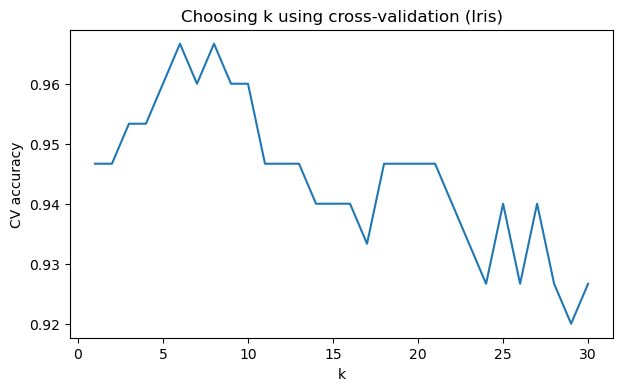

In [4]:
try:
    from sklearn.datasets import load_iris
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline
    from sklearn.neighbors import KNeighborsClassifier

    iris = load_iris()
    X, y = iris.data, iris.target

    ks = range(1, 31)
    mean_scores = []
    for k in ks:
        knn = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
        scores = cross_val_score(knn, X, y, cv=5, scoring="accuracy")
        mean_scores.append(scores.mean())

    best_k = ks[int(np.argmax(mean_scores))]
    print("Best k (by 5-fold CV accuracy):", best_k)

    plt.figure(figsize=(7,4))
    plt.plot(list(ks), mean_scores)
    plt.xlabel("k")
    plt.ylabel("CV accuracy")
    plt.title("Choosing k using cross-validation (Iris)")
    plt.show()
except Exception as e:
    print("Demo skipped:", e)


## Demo C) PCA: explained variance + reconstruction error

k for ~90% explained variance: 31
Reconstruction MSE: 0.09493527091385126


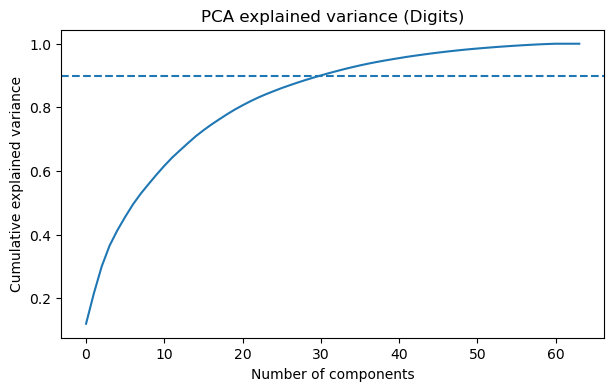

In [5]:
try:
    from sklearn.datasets import load_digits
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.metrics import mean_squared_error

    digits = load_digits()
    X = digits.data  # 64-dim (8x8 image flattened)
    Xs = StandardScaler().fit_transform(X)

    pca = PCA().fit(Xs)
    cum_var = np.cumsum(pca.explained_variance_ratio_)

    # choose k to explain ~90% variance
    k = int(np.searchsorted(cum_var, 0.90) + 1)
    print("k for ~90% explained variance:", k)

    pca_k = PCA(n_components=k).fit(Xs)
    Z = pca_k.transform(Xs)
    X_rec = pca_k.inverse_transform(Z)

    rec_err = mean_squared_error(Xs, X_rec)
    print("Reconstruction MSE:", rec_err)

    plt.figure(figsize=(7,4))
    plt.plot(cum_var)
    plt.axhline(0.90, linestyle="--")
    plt.xlabel("Number of components")
    plt.ylabel("Cumulative explained variance")
    plt.title("PCA explained variance (Digits)")
    plt.show()
except Exception as e:
    print("Demo skipped:", e)


## Demo D) t-SNE visualization (Digits dataset)

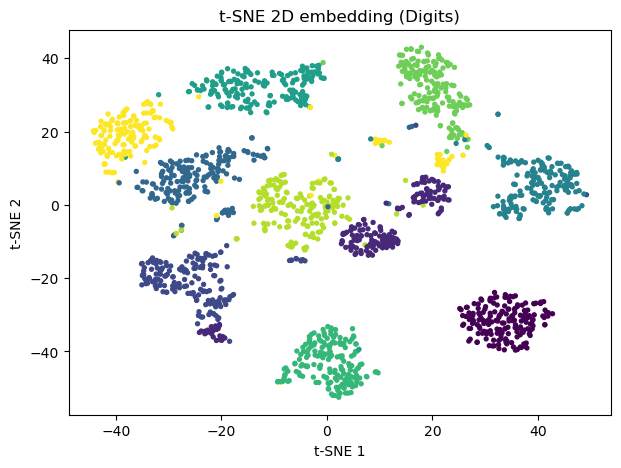

In [6]:
try:
    from sklearn.datasets import load_digits
    from sklearn.manifold import TSNE
    from sklearn.preprocessing import StandardScaler

    digits = load_digits()
    X = StandardScaler().fit_transform(digits.data)
    y = digits.target

    tsne = TSNE(n_components=2, perplexity=30, learning_rate="auto", init="pca", random_state=42)
    X2 = tsne.fit_transform(X)

    plt.figure(figsize=(7,5))
    plt.scatter(X2[:,0], X2[:,1], c=y, s=8)
    plt.title("t-SNE 2D embedding (Digits)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.show()
except Exception as e:
    print("Demo skipped:", e)
